# 🏡 **AirBNB Dataset Review** 🏨

# ❌ Update target audience and guiding questions

**Who?**
>* 🏢 **AirBNB Corporate** interested in maximizing customer satisfaction to increase repeat guests and encourage new guests to stay with AirBNB hosts
>
>
>* **AirBNB hosts** interested in maximizing the ratings

**Why?**
>* 💰 **Revenue Management:** 
>
>
>
>* 🤝 **Sales:**
>
>
>
>* 🛌 **Rooms Ops:**
>
>
>
>* 🍰 ☕ **Food and Beverage:**
>
>
>

**What?**
>* 🧾 Dataset comprised of... 
>  * 32 different features
>  * Nearly 120,000 reservation records
>  * Source cited in Readme

❌ **How?**
>* Which models/methods? 
>* Data prep and feature engineering

# 🎯  **Goal:**

Determining whether or not a host location would receive a score greater than or equal to 4/5.

# 📌 **To-Do**

---

- [ ] [TD1](#td1)
- [ ] [TD2](#td2)
- [ ] [TD3](#td3)
- [ ] [todo4](#td4)
- [ ] [todo5](#td5)
- [ ] [todo6](#td6)
- [ ] [todo7](#td7)

---

# 📂 **Imports**

In [1]:
## Data Handling
import pandas as pd
import numpy as np
from scipy import stats

## Visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact_manual
import missingno

## Modeling - SKLearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn import set_config
set_config(display='diagram')

# from sklearn.naive_bayes import MultinomialNB # for naive bayes model

## Settings
%matplotlib inline
plt.style.use('seaborn-talk')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('max_rows', 100)

In [2]:
## Personal functions
import clf_functions.functions as cf
%load_ext autoreload
%autoreload 1
%aimport clf_functions.functions

## ❓ FSDS

In [3]:
# import fsds as fs

In [4]:
# fs.ihelp_menu([fs.ihelp_menu, sort_report])

# 📖 **Read Data**

In [5]:
## Reading data and saving to a DataFrame

source = 'http://data.insideairbnb.com/united-states/dc/washington-dc/2021-07-10/data/listings.csv.gz'

data = pd.read_csv(source)

In [6]:
## Inspecting imported dataset
data.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,nan,38.86,-76.99,Private room in house,Private room,1,nan,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,nan,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87
1,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",nan,38.91,-77.00,Private room in townhouse,Private room,2,nan,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",nan,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22
2,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5803/profile_...,https://a0.muscache.com/im/users/5803/profile_...,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",nan,38.91,-76.94,Private room

In [7]:
## Checking number of rows and columns
data.shape

(8033, 74)

---

> The initial read of the dataset shows there are 74 features and 8,033 entries. A quick glance at the `.head()` gives a sample of the entries, showing that some of the features are not relevant to my analysis.
>
> I need to get a better idea of the statistics for the dataset, especially any missing values and the datatypes for each column. I need to pre-process this data before I can perform any modeling.

---

# 🔎 **Interactive Investigation**

---

> To increase accessibility to the data, **I include a widget to allow the user to sort through the data interactively.** I use [**Jupyter Widgets**](https://ipywidgets.readthedocs.io/en/latest/index.html) to create this interactive report.
>
>**To use:** select which column by which you would like to sort from the dropdown menu, then click the "Run Interact" button.
>
>***Note about 'Drop_Cols' and Cols:*** these keyword arguments are used to allow the user to drop specific columns. The 'Cols' dropdown menu does not affect the resulting report; the data is filtered from the report prior to displaying the results. 
>
>I chose to include this option for flexibility and adaptability, but it does have the unintended consequence of creating another drop-down menu. Please ignore this menu, as it does not provide any additional functionality. For future work, I will disable the menu to prevent confusion.

---

In [8]:
## Running report on unfiltered dataset

interact_manual(cf.sort_report, Sort_by=list(cf.report_df(data).columns),
                Source=source);

interactive(children=(Text(value='http://data.insideairbnb.com/united-states/dc/washington-dc/2021-07-10/data/…

In [9]:
data.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,nan,38.86,-76.99,Private room in house,Private room,1,nan,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,nan,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87
1,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",nan,38.91,-77.00,Private room in townhouse,Private room,2,nan,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",nan,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22
2,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5803/profile_...,https://a0.muscache.com/im/users/5803/profile_...,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",nan,38.91,-76.94,Private room

---

> After reviewing my data, I see there are several features that contain irrelevant entries (URLs, source data, meta data) or values that are too complicated for simple processing (such as host and listing descriptions).
>
> I will drop these columns for the second report to review the remaining data for further processing.

---

In [10]:
## Specifying columns to drop

drop = ['name', 'description', 'neighborhood_overview', 'host_name',
        'host_about', 'neighbourhood', 'property_type',
        'listing_url', 'scrape_id', 'last_scraped', 'picture_url','host_url',
        'host_thumbnail_url','host_picture_url','calendar_last_scraped']

In [11]:
## Creating updated interactive report

interact_manual(cf.sort_report, Drop_Cols = True, Cols = drop,
                Sort_by=list(cf.report_df(data).columns), Source=source);

interactive(children=(Text(value='http://data.insideairbnb.com/united-states/dc/washington-dc/2021-07-10/data/…

---

> **Interpretation:**
>
> The report shows that the dataset has a big problem with missing values:
>
> * **Empty:**
>   * `neighbourhood_group_cleansed`
>   * `bathrooms`
>   * `calendar_updated`
>
>
> * **Nearly empty:**
>  * `license`
>
>
> * **Missing 26-39% of data:**
>  * `host_about`
>  * `neighborhood_overview`
>  * `neighbourhood`
>  * `host_response_time`
>  * `host_response_rate`
>  * `review_scores_value`
>  * `review_scores_checkin`
>  * `review_scores_location`
>  * `review_scores_accuracy`
>  * `review_scores_communication`
>  * `review_scores_cleanliness`
>  * `host_acceptance_rate`
>  * `reviews_per_month`
>  * `first_review`
>  * `review_scores_rating`
>  * `last_review`
>
>---
>
> I will need to address these missing values before processing with the modeling. A few options include:
>
> * **Filling with the string "missing"** to indicate the value was missing.
>    * *I would be able to treat "missing" as a distinct category and use it for modeling as well.*
>
>
> * **Dropping the rows with missing values.**
>    * *This may negatively impact the accuracy of my results by overfitting to the training data.*
>
>
> * I could **use the `SimpleImputer` tool from SKLearn to fill the missing values** with the mean, median, or mode values for each.
>    * *I could couple this with a `GridSearchCV` to identify the method that has the strongest positive impact on my classification metrics.*

---

---

> To get a better idea of the missing values, I create a visual of the values via the 'Missingno' package. This visualization package includes several options for visualizing the missing data.

---

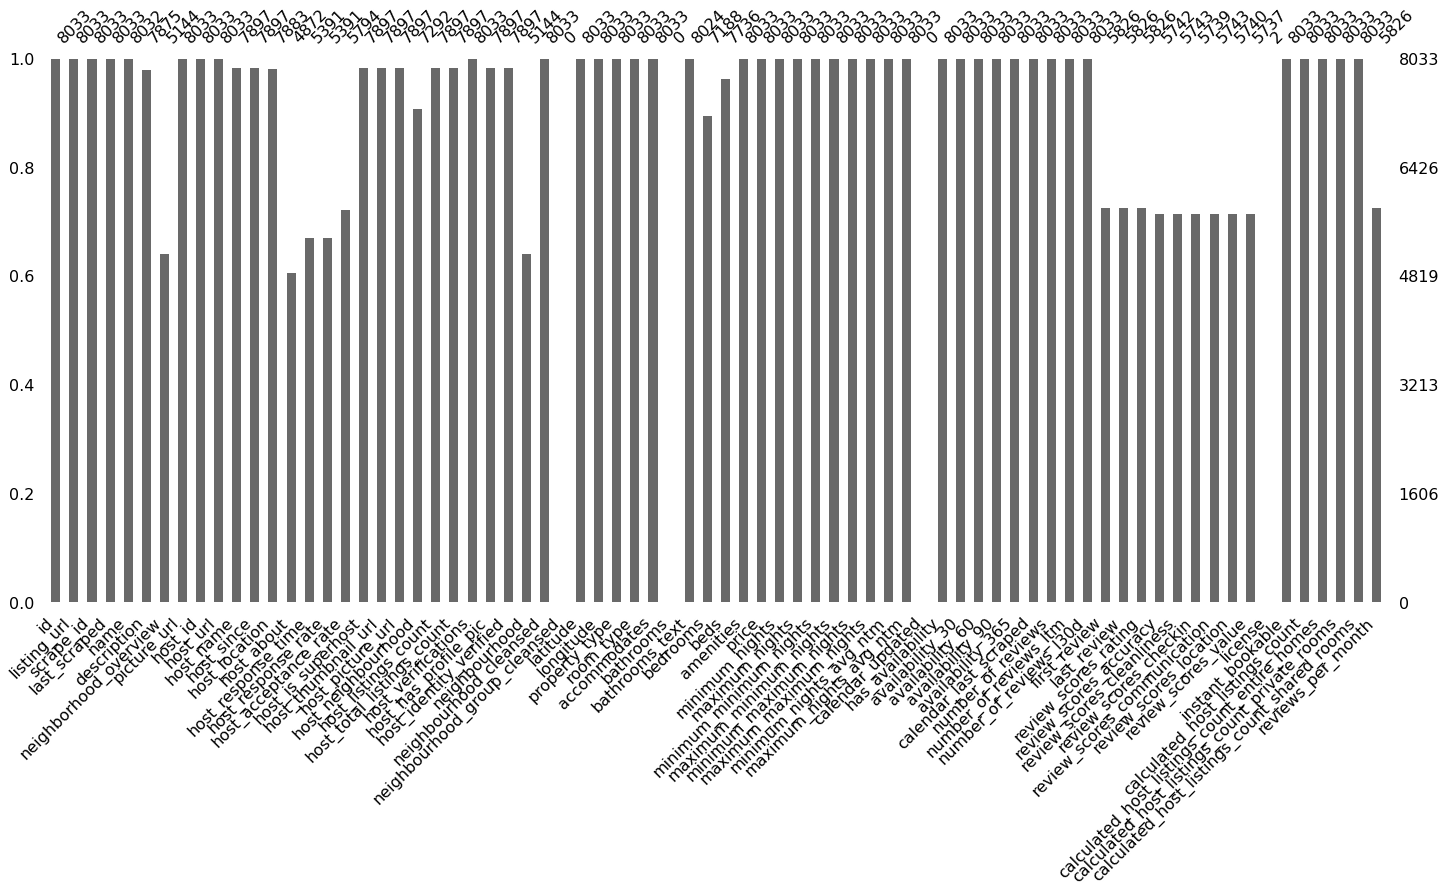

In [12]:
## Visually inspecting missing values

missingno.bar(data, labels=True);

---

> Based on this visualization, I see that **there is a consistent trend in missing values for review scores:** if a row is missing one review score, it seems to be missing all of them.
>
> Additionally, **there are many missing values for the response time, response rate, and acceptance rate.** I want to use these columns in my classification, so I will need to replace those missing values.
>
> After reviewing these details, **I feel more comfortable with the option of dropping those rows with missing review values.** I will drop the values as part of my overall classification process.

---

# 🧼 **Data Cleaning and EDA**

## ❎ Dropping Rows and Features

In [13]:
## Creating new dataframe that does not include the irrelevant features
df = data.drop(columns= drop).copy()

In [14]:
## Dropping rows with missing values
df_cleaned = df.dropna()

In [15]:
## Confirming dropped missing values
df_cleaned.isna().sum()

id                                              0
host_id                                         0
host_since                                      0
host_location                                   0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
room_type                                       0
accommodates                                    0


# 🪓 **Train/Test Split**

---

> Before I run any further pre-processing, I split my data into training and test sets to allow me to test my model's performance.

---

In [16]:
## Creating features/target for dataset
target = 'review_scores_rating'

X = data.drop(columns = target).copy()
y = data[target].copy()

In [17]:
## Confirming same number of rows
X.shape[0] == y.shape[0]

True

In [18]:
## Splitting to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
X_train

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3821,26819224,https://www.airbnb.com/rooms/26819224,20210710190002,2021-07-10,Navy Yard Apartment Home,"This is a luxury listing, that is rated one of...",We are located in a wonderful area with a lot ...,https://a0.muscache.com/pictures/c6683927-99ab...,4227373,https://www.airbnb.com/users/show/4227373,Nasir,2012-11-23,"Washington, District of Columbia, United States",Community leader and venture capitalists runni...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/726f6...,https://a0.muscache.com/im/pictures/user/726f6...,NaN,1.00,1.00,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Southwest Employment Area, Southwest/Waterfron...",nan,38.88,-77.01,Entire apartment,Entire home/apt,2,nan,1 bath,1.00,1.00,"[""Dedicated workspace"", ""Long term stays allow...",$190.00,2,1125,2,2,1125,1125,2.00,"1,125.00",nan,t,0,0,0,0,2021-07-10,8,0,0,2019-03-08,2019-03-31,5.00,5.00,4.63,5.00,4.88,4.88,NaN,f,1,1,0,0,0.28
4348,32036948,https://www.airbnb.com/rooms/32036948,20210710190002,2021-07-10,A cozy 1BR DuPont haven!,Welcome to my cozy 1BR DuPont haven!<br />Make...,Washington neighborhoods tend to have a singul...,https://a0.muscache.com/pictures/108b903d-814e...,22485104,https://www.airbnb.com/users/show/22485104,Timna,2014-10-13,"Washington, District of Columbia, United States",NaN,within a few hours,100%,33%,t,https://a0.muscache.com/im/pictures/user/d6bae...,https://a0.muscache.com/im/pictures/user/d6bae...,Dupont Circle,3.00,3.00,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Washington, District of Columbia, United States","Dupont Circle, Connecticut Avenue/K Street",nan,38.91,-77.04,Entire apartment,Entire home/apt,4,nan,1 bath,1.00,2.00,"[""Cooking basics"", ""First aid kit"", ""Lockbox"",...",$190.00,2,112,2,2,1125,1125,2.00,"1,125.00",nan,t,0,0,0,0,2021-07-10,46,0,0,2019-04-04,2020-03-09,5.00,4.89,5.00,5.00,4.98,4.89,NaN,f,1,1,0,0,1.66
2273,16811541,https://www.airbnb.com/rooms/16811541,20210710190002,2021-07-10,"Charming attached house in Georgetown, DC",Historic home one block off Wisconsin Avenue i...,Historic Georgetown is famous for its stately ...,https://a0.muscache.com/pictures/811e629b-7dae...,111810504,https://www.airbnb.com/users/show/111810504,Chris,2017-01-16,"Washington, District of Columbia, United States",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/c608f...,https://a0.muscache.com/im/pictures/user/c608f...,Georgetown,1.00,1.00,"['phone', 'reviews']",t,f,"Washington, District of Columbia, United States","Georgetown, Burleith/Hillandale",nan,38.91,-77.07,Entire house,Entire home/apt,3,nan,1.5 baths,2.00,2.00,"[""First aid kit"", ""Dedicated workspace"", "

## 🎯 Inspecting the Target Variable

In [20]:
## Checking for class imbalances in target variable
y_train.describe()

count   4,406.00
mean        4.69
std         0.69
min         0.00
25%         4.68
50%         4.86
75%         5.00
max         5.00
Name: review_scores_rating, dtype: float64

In [21]:
## Checking value counts (binned to see the ranges of values)
y_train.value_counts(dropna=False,sort=False, bins=10, normalize=True)

(-0.006, 0.5]   0.01
(0.5, 1.0]      0.00
(1.0, 1.5]      0.00
(1.5, 2.0]      0.00
(2.0, 2.5]      0.00
(2.5, 3.0]      0.01
(3.0, 3.5]      0.00
(3.5, 4.0]      0.02
(4.0, 4.5]      0.06
(4.5, 5.0]      0.62
Name: review_scores_rating, dtype: float64

In [22]:
## Confirming all scores are zero or above
y_train.min()

0.0

In [23]:
## Excluding ratings above 4 to inspect the marginal ratings
y_train[y_train < 4].value_counts(dropna=False,sort=False, bins=4, normalize=True)

(-0.004880000000000001, 0.97]   0.34
(0.97, 1.94]                    0.09
(1.94, 2.91]                    0.10
(2.91, 3.88]                    0.47
Name: review_scores_rating, dtype: float64

In [24]:
## Checking for missing values
y_train.isna().sum()

1618

In [25]:
y_train = y_train.dropna()

---

> The target feature, `'review_scores_rating'`, is currently a range of values from 0 to 5, with 6% of the scores being 4 or above. The `.value_counts()` results show a value sub-zero; this is for the purpose of binning the values; the lowest value is actually 0.00.
>
>
> Of the scores less than 4, a little under half are between 3 and 4 (rounded) and about a third are between 0 and 1 (rounded).
>
>
>
>In order to use these values, I would need to bin them into categories based on ranges of values for analysis.

---

# 🚿 **Preprocessing Pipeline**

In [26]:
# cat_cols = ['hotel', 'meal','arrival_date_month', 'country', 'market_segment',
#             'distribution_channel','is_repeated_guest','reserved_room_type',
#             'assigned_room_type','deposit_type', 'agent',
#             'customer_type','reservation_status']

# cont_cols = [col for col in X_train.drop(['reservation_status_date','company'],axis=1).columns if col not in cat_cols]

# cont_cols

In [27]:
# X_train[cat_cols] = X_train[cat_cols].astype(str)

In [28]:
# X_test[cat_cols] = X_test[cat_cols].astype(str)

In [29]:
# ## Creating ColumnTransformer and sub-transformers for imputation and encoding

# # Filling missing "Children"
# zero_transformer = SimpleImputer(strategy='constant', fill_value=0)

# ##  
# missing_transformer = SimpleImputer(strategy='constant', fill_value='missing')

# ## Encoding categoricals - handling errors to prevent issues w/ test set
# categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# cat_pipe = Pipeline(steps=[('imputer', missing_transformer),
#                       ('ohe', categorical_transformer)])

# cont_pipe = Pipeline(steps=[('imputer', zero_transformer),
#                            ('scaler', StandardScaler())])

# ## Instantiating the ColumnTransformer and including all transformers
# preprocessor = ColumnTransformer(
#     transformers=[('conts', cont_pipe, cont_cols),
#                   ('cats', cat_pipe, cat_cols)])

# preprocessor

In [30]:
# preprocessor.fit(X_train)

# ## Getting feature names from OHE
# ohe_cat_names = preprocessor.named_transformers_['cats'].named_steps['ohe'].get_feature_names(cat_cols)

In [31]:
# ## Generating list for column index
# final_cols = [*cont_cols, *ohe_cat_names]

# ## Fit and transform the data via the ColumnTransformer
# X_train_tf = preprocessor.transform(X_train)
# X_train_tf_df = pd.DataFrame(X_train_tf, columns=final_cols, index=X_train.index)

# ## Transforming the test set and saving
# X_test_tf = preprocessor.transform(X_test)
# X_test_tf_df = pd.DataFrame(X_test_tf, columns=final_cols, index=X_test.index)

# display(X_train_tf_df.head(5),X_test_tf_df.head(5))

# 📝 Next Steps

* Process classification model - i.e. Logreg, KNN, DecisionTrees, etc.
* Evaluate results
* Determine if I need to redo pre-processing steps

# 🚿 Classification Pipeline